In [7]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28})

In [8]:
# Generate data
np.random.seed(0)
A = np.random.randn(200, 80)
b = np.random.randn(200)
x = cp.Variable(80)

# Solve least squares problem
prob_ls = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - b)))
prob_ls.solve()
x_ls = x.value
r_ls = A @ x_ls - b

# Solve l-1 norm problem
prob_l1 = cp.Problem(cp.Minimize(cp.norm(A @ x - b, 1)))
prob_l1.solve()
x_l1 = x.value
r_l1 = A @ x_l1 - b
r_min = -3
r_max = 3

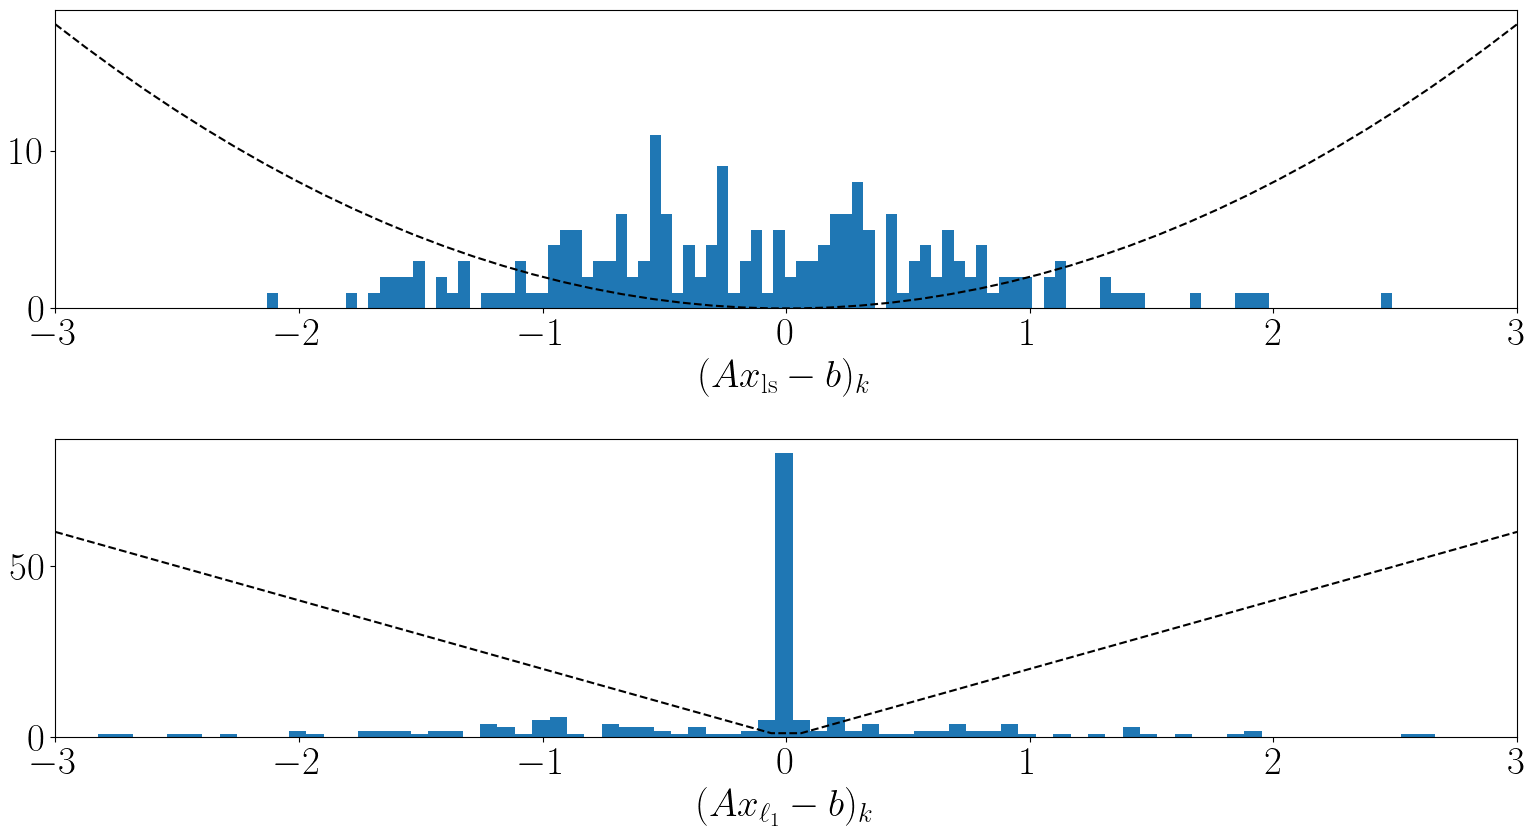

In [9]:
# Generate x axis
r_axis = np.linspace(r_min, r_max)
y_norm_ls = 2 * r_axis * r_axis
y_norm_l1 = 20 * np.abs(r_axis)

fig, axs = plt.subplots(2, 1, figsize=(16, 9),
                        tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(r_ls, bins=100)
axs[0].plot(r_axis, y_norm_ls, linestyle="dashed", color="k")
axs[0].set_xlabel(r'$(Ax_{\rm ls} - b)_k$')
axs[0].set_xlim([r_min, r_max])
axs[1].hist(r_l1, bins=100)
axs[1].plot(r_axis, y_norm_l1, linestyle="dashed", color="k")
axs[1].set_xlabel(r'$(Ax_{{\rm \ell}_1} - b)_k$')
axs[1].set_xlim([r_min, r_max])

plt.savefig('l1_norm.pdf')